In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

In [5]:
attrdata = pd.read_csv("Table_1.csv")
attrdata

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,898,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,21.09,Direct,Non Promoted,Yes,Stay
898,899,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Left
899,900,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.01,Direct,Non Promoted,NaN,Left
900,901,Rahul,9876544345,Vijayawada,B1,Operation,Female,0.03,< =1,0.03,Single,22.02,Direct,Non Promoted,Yes,Stay


In [6]:
attrdata.drop(0,inplace=True)

In [7]:
attrdata.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       4
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           2
Stay/Left                0
dtype: int64

In [8]:
attrdata.dropna(axis=0,inplace=True)

In [9]:
attrdata.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       0
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           0
Stay/Left                0
dtype: int64

In [10]:
gender_dict = attrdata["Gender "].value_counts()
gender_dict

Gender 
Male      655
Female    234
other       6
Name: count, dtype: int64

In [11]:
attrdata.shape

(895, 16)

<Axes: xlabel='Gender '>

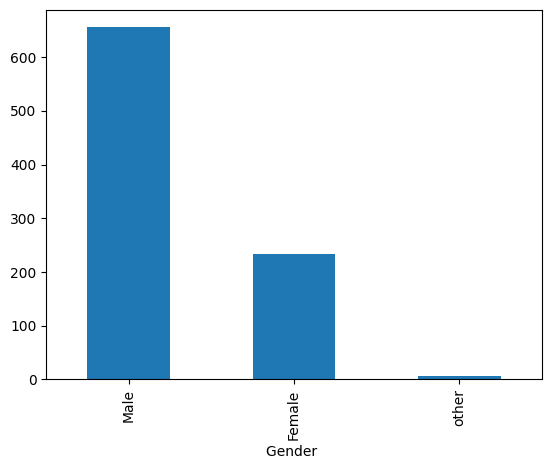

In [12]:
attrdata['Gender '].value_counts().plot(kind='bar')

In [13]:
stay_left_dict = attrdata['Stay/Left'].value_counts()
stay_left_dict

Stay/Left
Stay    592
Left    303
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'other')])

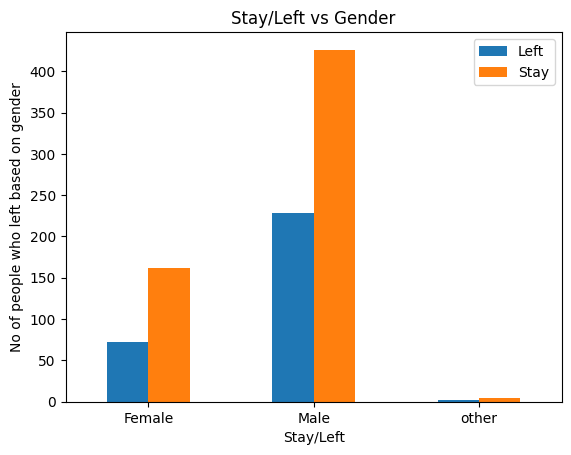

In [14]:
pd.crosstab(attrdata['Gender '],attrdata['Stay/Left']).plot(kind='bar')
plt.title("Stay/Left vs Gender")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)


In [15]:
promoted_dict = attrdata["Promoted/Non Promoted"].value_counts()
promoted_dict

Promoted/Non Promoted
Promoted        457
Non Promoted    438
Name: count, dtype: int64

<Axes: xlabel='Promoted/Non Promoted'>

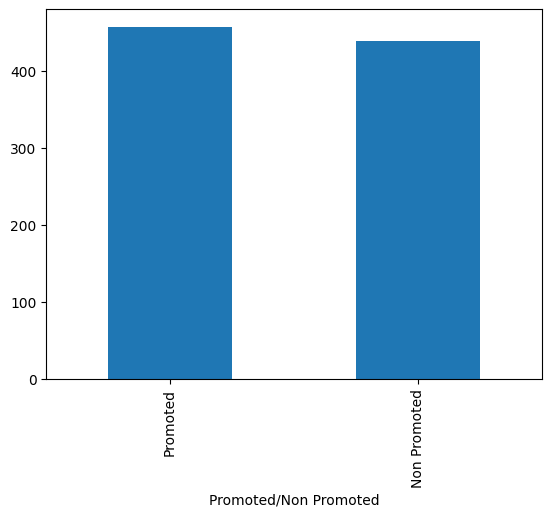

In [16]:
attrdata['Promoted/Non Promoted'].value_counts().plot(kind='bar')

In [17]:
func_dict = attrdata["Function"].value_counts()
func_dict

Function
Operation    831
Support       52
Sales         12
Name: count, dtype: int64

In [18]:
Hiring_dict = attrdata["Hiring Source"].value_counts()
Hiring_dict

Hiring Source
Direct               708
Agency               116
Employee Referral     71
Name: count, dtype: int64

In [19]:
Marital_dict = attrdata["Marital Status"].value_counts()
print(Marital_dict)

Marital Status
Single    533
Marr.     356
Div.        2
NTBD        2
Sep.        2
Name: count, dtype: int64


In [20]:
Emp_dict = attrdata["Emp. Group"].value_counts()
Emp_dict['other group'] = 1
print(Emp_dict)


Emp. Group
B1             537
B2             275
B3              59
B0               8
B4               7
B5               4
B7               2
B6               1
C3               1
D2               1
other group      1
Name: count, dtype: int64


In [21]:
job_dict = attrdata["Job Role Match"].value_counts()
job_dict


Job Role Match
Yes    480
No     415
Name: count, dtype: int64

<Axes: xlabel='Job Role Match'>

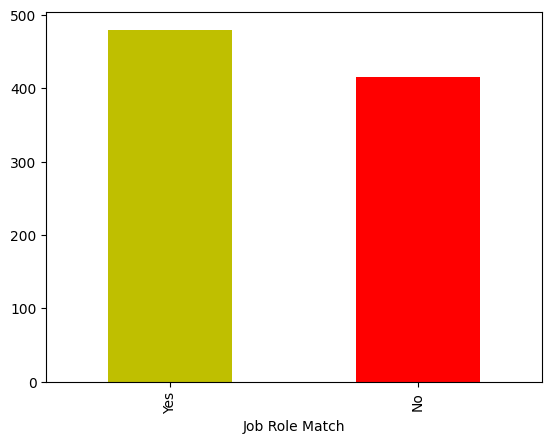

In [22]:
c = ["y","r"]
attrdata['Job Role Match'].value_counts().plot(kind='bar',color = c)


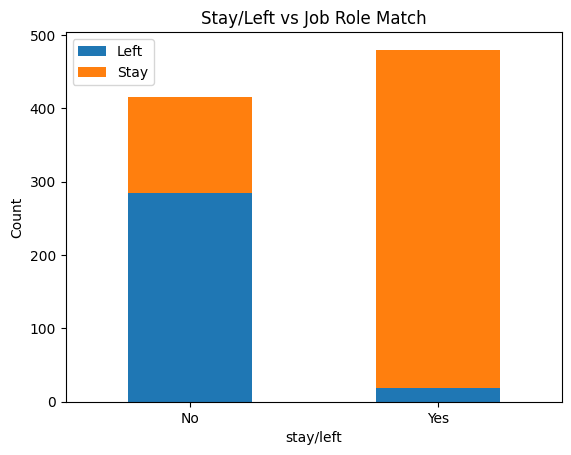

In [23]:
crosstab = pd.crosstab(attrdata['Job Role Match'], attrdata['Stay/Left'])

# Plot the crosstab
crosstab.plot(kind='bar', stacked=True)
plt.title("Stay/Left vs Job Role Match")
plt.xlabel("stay/left")
plt.ylabel("Count")
plt.legend(["Left", "Stay"])
plt.xticks(rotation=0)
plt.show()

In [24]:
import seaborn as sns

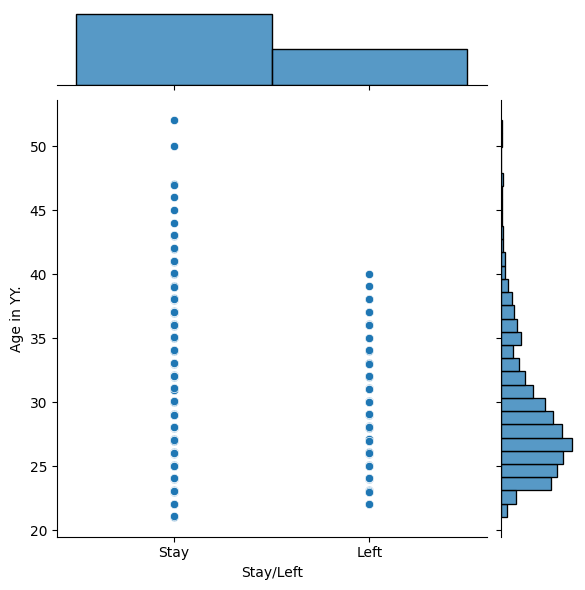

In [25]:
sns.jointplot(x='Stay/Left',y='Age in YY.',data=attrdata)

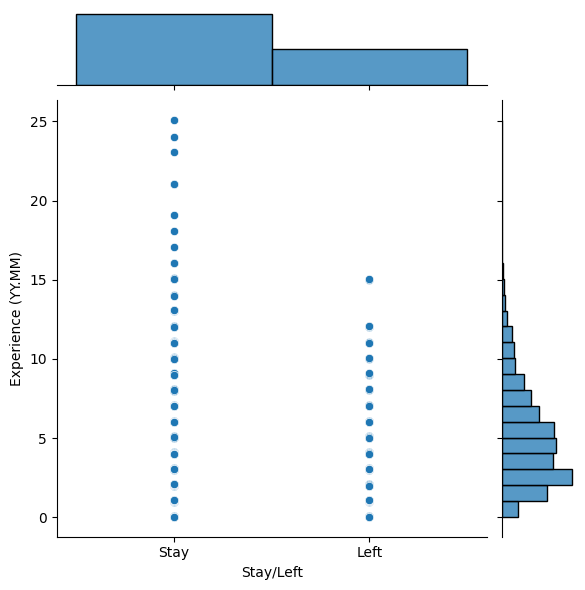

In [26]:
sns.jointplot(x='Stay/Left',y='Experience (YY.MM)',data=attrdata)

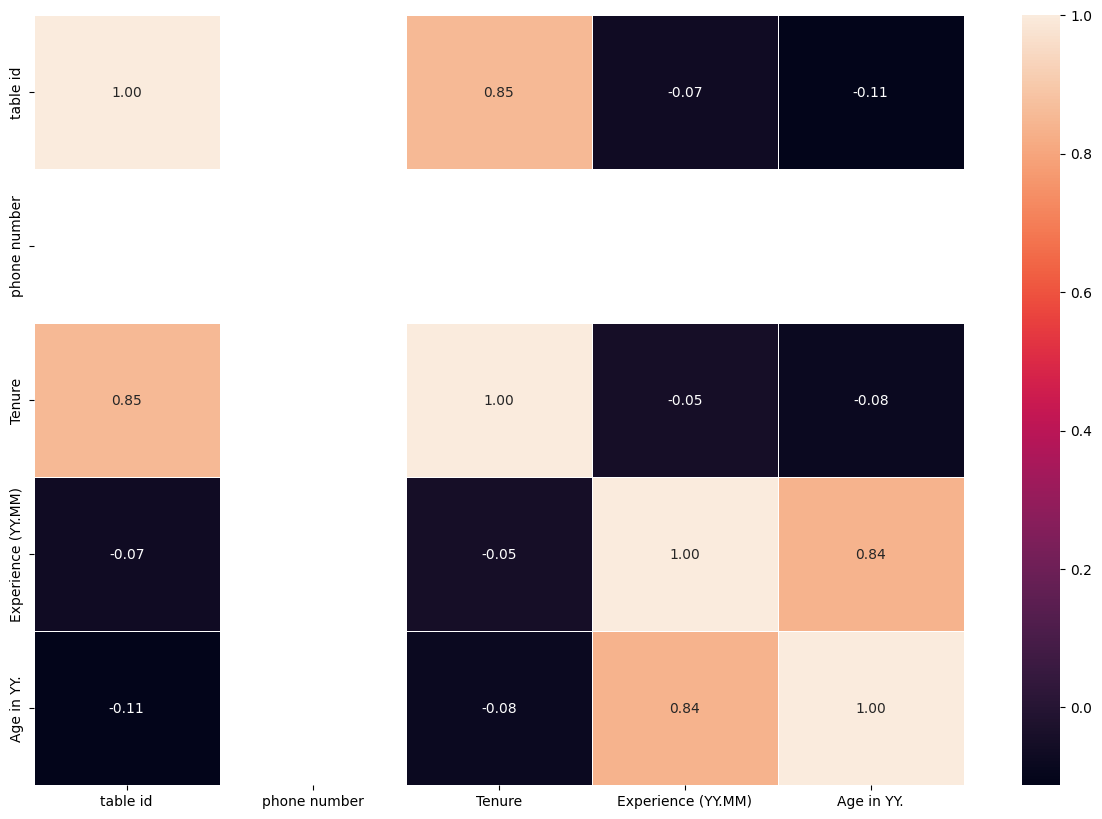

In [27]:
# Let's make our correlation matrix visual
# Select only the numeric columns
numeric_data = attrdata.select_dtypes(include='number')

# Now calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Visualize the correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", ax=ax)
plt.show()



In [28]:
location_dict = attrdata["Location"].value_counts()
print(location_dict)

Location
Chennai       255
Noida         236
Bangalore     210
Hyderabad      62
Pune           55
Madurai        29
Lucknow        20
Nagpur         14
Vijayawada      6
Mumbai          4
Gurgaon         3
Kolkata         1
Name: count, dtype: int64


In [29]:
location_dict_new = {
    'Chennai':       7,
    'Noida':         6,
    'Bangalore':     5,
    'Hyderabad':     4,
    'Pune':          3,
    'Madurai':       2,
    'Lucknow':       1,
    'other place':         0,
}
print(location_dict_new)

{'Chennai': 7, 'Noida': 6, 'Bangalore': 5, 'Hyderabad': 4, 'Pune': 3, 'Madurai': 2, 'Lucknow': 1, 'other place': 0}


In [30]:
# Now we will make a function for the location column to
# make a new column where encoded location values will be
# there because our machine learning algorithm will only
# understand int/float values.

def location(x):
    if str(x) in location_dict_new.keys():
        return location_dict_new[str(x)]

    else:
        return location_dict_new['other place']
        
data_l = attrdata["Location"].apply(location)
attrdata['New Location'] = data_l
attrdata.head()

# A new location column has been added

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,Stay,5


In [31]:
# data, this function is used to convert the categorical
# values to dummy variables and the same thing has been
# done with:
# 1. Function
# 2. Hiring Source
# 3. New Marital
# 4. New Gender
# 5. Tenure group

gen = pd.get_dummies(attrdata["Function"])
gen.head()


,Operation,Sales,Support
1,False,False,True
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False


In [32]:
hr = pd.get_dummies(attrdata["Hiring Source"])
hr.head()


,Agency,Direct,Employee Referral
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,False,True,False


In [33]:
# Marital Status
def Mar(x):
    if str(x) in Marital_dict.keys() and Marital_dict[str(x)] > 100:
        return str(x)
    else:
        return 'other status'

data_l = attrdata["Marital Status"].apply(Mar)
attrdata['New Marital'] = data_l
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,Stay,5,Marr.


In [34]:
# Using the get_dummies to function for New Marital we
# are converting categorical values into dummy variables

Mr = pd.get_dummies(attrdata["New Marital"])
Mr.head()


,Marr.,Single,other status
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False


In [35]:
# Promoted/Not Promoted
# Here, with the help of Promoted function, we are
# converting Promoted and Non promoted values into 1 and
# 0 respectively for encoding purposes.

def Promoted(x):
    if x == 'Promoted':
        return int(1)
    else:
        return int(0)
    
data_l = attrdata["Promoted/Non Promoted"].apply(Promoted)
attrdata['New Promotion'] = data_l
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.,1
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,Stay,5,Marr.,1


In [36]:
# Employee Group
# Here first, we are creating a dictionary for the employee
# group and tagging each group to the respective integer
# values, later we are creating an emp() function where the
# encoding of the categorical values is done – similar to
# marital status.

Emp_dict_new = {
'B1': 4,
'B2': 3,
'B3': 2,
'other group': 1,
}
def emp(x):
    if str(x) in Emp_dict_new.keys():
        return str(x)
    else:
        return 'other group'
    
data_l = attrdata["Emp. Group"].apply(emp)
attrdata['New EMP'] = data_l

emp = pd.get_dummies(attrdata["New EMP"])
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay,6,Marr.,1,other group
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1,B2
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,Marr.,39.09,Direct,Promoted,No,Stay,5,Marr.,1,B3


In [37]:
# Job Role Match
# Here, we are using the Job() function where categorical
# values are Yes and No which needs to be converted into
# integer values i.e. 1/0 then we are assigning the New Job
# Role Match.

def Job(x):
    if x == 'Yes':
        return int(1)
    else:
        return int(0)
    
data_l = attrdata["Job Role Match"].apply(Job)
attrdata['New Job Role Match'] = data_l
attrdata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP,New Job Role Match
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,38.08,Direct,Promoted,No,Stay,6,Marr.,1,other group,0
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,36.04,Direct,Promoted,Yes,Stay,5,Marr.,1,B3,1
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,32.07,Direct,Promoted,Yes,Stay,6,Marr.,1,B2,1
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,32.05,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2,1
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,...,39.09,Direct,Promoted,No,Stay,5,Marr.,1,B3,0


In [38]:
# Gender
# Here, we are using the Gen() function using gender_dict
# (dictionary) which will be encoded first using the
# dictionary keys, and then the changes will be applied to
# the dataset based on changes that are done.

# Define gender_dict before using it
gender_dict = {
    "Male": 1,
    "Female": 2,
    "Non-binary": 3
}

def Gen(x):
    if x in gender_dict:  
        return str(x)
    else:
        return 'other'

# Apply function to create a new column
data_l = attrdata["Gender "].apply(Gen)
attrdata['New Gender'] = data_l

attrdata.head()


,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left,New Location,New Marital,New Promotion,New EMP,New Job Role Match,New Gender
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,Direct,Promoted,No,Stay,6,Marr.,1,other group,0,Male
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,Direct,Promoted,Yes,Stay,5,Marr.,1,B3,1,Male
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,Direct,Promoted,Yes,Stay,6,Marr.,1,B2,1,Male
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,Direct,Non Promoted,Yes,Stay,1,Marr.,0,B2,1,Male
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,...,Direct,Promoted,No,Stay,5,Marr.,1,B3,0,Male


In [39]:
# get_dummies() function for the same purposes for New
# gender and Tenure groups.

gend = pd.get_dummies(attrdata["New Gender"])
gend.head()

,Female,Male,other
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,False,True,False


In [40]:
tengrp = pd.get_dummies(attrdata["Tenure Grp."])
tengrp.head()

,< =1,> 1 & < =3
1,True,False
2,True,False
3,True,False
4,True,False
5,True,False


In [41]:
# Now, let’s concatenate the columns which are being
# cleaned, sorted, and manipulated by us as processed
# data.

dataset = pd.concat([attrdata, hr, Mr, emp, tengrp, gen, gend], axis = 1)
dataset.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,...,False,True,True,False,False,False,True,False,True,False
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,...,True,False,True,False,True,False,False,False,True,False
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,...,False,False,True,False,True,False,False,False,True,False
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,...,False,False,True,False,True,False,False,False,True,False
5,6,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,9.01,...,True,False,True,False,True,False,False,False,True,False


In [42]:
# Convert only boolean columns (True/False) to integers (1/0)
bool_columns = dataset.select_dtypes(include=['bool']).columns
dataset[bool_columns] = dataset[bool_columns].astype(int)

print(dataset.head())

   table id name  phone number   Location Emp. Group   Function Gender   \
1         2  sid    9876544345      Noida         B7    Support    Male   
2         3  sid    9876544345  Bangalore         B3  Operation    Male   
3         4  sid    9876544345      Noida         B2  Operation    Male   
4         5  sid    9876544345    Lucknow         B2  Operation    Male   
5         6  sid    9876544345  Bangalore         B3  Operation    Male   

   Tenure Tenure Grp.  Experience (YY.MM)  ... B3  other group < =1  \
1    0.00        < =1               13.00  ...  0            1    1   
2    0.01        < =1               16.05  ...  1            0    1   
3    0.01        < =1                6.06  ...  0            0    1   
4    0.00        < =1                7.00  ...  0            0    1   
5    0.01        < =1                9.01  ...  1            0    1   

  > 1 & < =3 Operation Sales  Support Female  Male other  
1          0         0     0        1      0     1     0  
2   

In [43]:
dataset.columns


Index(['table id', 'name', 'phone number', 'Location', 'Emp. Group',
       'Function', 'Gender ', 'Tenure', 'Tenure Grp.', 'Experience (YY.MM)',
       'Marital Status', 'Age in YY.', 'Hiring Source',
       'Promoted/Non Promoted', 'Job Role Match', 'Stay/Left', 'New Location',
       'New Marital', 'New Promotion', 'New EMP', 'New Job Role Match',
       'New Gender', 'Agency', 'Direct', 'Employee Referral', 'Marr.',
       'Single', 'other status', 'B1', 'B2', 'B3', 'other group', '< =1',
       '> 1 & < =3', 'Operation', 'Sales', 'Support', 'Female', 'Male',
       'other'],
      dtype='object')

In [44]:
# Let’s drop the columns which are not important anymore

dataset.drop(["table id", "name", "Marital Status","Promoted/Non Promoted","Function","Emp. Group","Job Role Match","Location"
              ,"Hiring Source","Gender ", 'Tenure', 'New Gender', 'New Marital', 'New EMP'],axis=1,inplace=True)


In [45]:
dataset1 = dataset.drop(['Tenure Grp.', 'phone number'], axis = 1)
dataset1.columns

Index(['Experience (YY.MM)', 'Age in YY.', 'Stay/Left', 'New Location',
       'New Promotion', 'New Job Role Match', 'Agency', 'Direct',
       'Employee Referral', 'Marr.', 'Single', 'other status', 'B1', 'B2',
       'B3', 'other group', '< =1', '> 1 & < =3', 'Operation', 'Sales',
       'Support', 'Female', 'Male', 'other'],
      dtype='object')

In [46]:
# Let’s see our target column
def Target(x):
    if x in "Stay":  # If x is "Stay", the function returns False, meaning the employee stayed.
        return False
    else:               # If x is not "Stay", the function returns True, meaning the employee left.
        return True
    
data_l = dataset1["Stay/Left"].apply(Target)     # Applies the Target() function to each row in the "Stay/Left" column.
                                                  # This replaces "Stay" with False and any other value with True.
                                                    # The transformed values are stored in the data_l variable.

dataset1['Stay/Left'] = data_l      #Updates the "Stay/Left" column in dataset1 with the modified values (True or False).

dataset1['Stay/Left'].head()

1    False
2    False
3    False
4    False
5    False
Name: Stay/Left, dtype: bool

In [47]:
# Saving the cleaned dataset into another CSV file
dataset1.to_csv("new processed table.csv")

In [48]:
# Now, from the processed data we have to separate the
# features and target column again.

dataset = pd.read_csv("new processed table.csv")
dataset = pd.DataFrame(dataset)
y = dataset["Stay/Left"]
X = dataset.drop("Stay/Left",axis=1)  # droping 'Stay/Left' column and storing it into variable X

In [49]:
# Splitting data - Train test split

from sklearn.model_selection import train_test_split 

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train.head()


,Unnamed: 0,Experience (YY.MM),Age in YY.,New Location,New Promotion,New Job Role Match,Agency,Direct,Employee Referral,Marr.,...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
684,688,4.09,26.06,5,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
220,224,2.08,26.00,6,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
476,480,7.11,29.06,2,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
431,435,3.00,25.02,6,1,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
868,872,7.00,28.06,5,1,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [51]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()    # Builds a tree where each node represents a decision (e.g., "If tenure < 1 year → Likely to leave").
rm=RandomForestClassifier()    # Uses multiple decision trees to reduce overfitting and improve accuracy.
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)  # Finds 3 nearest employees (based on tenure, experience, function, etc.) and predicts based on their outcomes.
                                          # Example: If 2 out of 3 similar employees left, it predicts this employee may also leave.
svm = svm.SVC(kernel='linear')

In [52]:
import pandas as pd  

df = pd.read_csv("new processed table.csv")


In [54]:
print(df.isnull().sum())

Unnamed: 0            0
Experience (YY.MM)    0
Age in YY.            0
Stay/Left             0
New Location          0
New Promotion         0
New Job Role Match    0
Agency                0
Direct                0
Employee Referral     0
Marr.                 0
Single                0
other status          0
B1                    0
B2                    0
B3                    0
other group           0
< =1                  0
> 1 & < =3            0
Operation             0
Sales                 0
Support               0
Female                0
Male                  0
other                 0
dtype: int64


In [55]:
df.fillna(0, inplace=True)

In [56]:
print(df.isnull().sum())

Unnamed: 0            0
Experience (YY.MM)    0
Age in YY.            0
Stay/Left             0
New Location          0
New Promotion         0
New Job Role Match    0
Agency                0
Direct                0
Employee Referral     0
Marr.                 0
Single                0
other status          0
B1                    0
B2                    0
B3                    0
other group           0
< =1                  0
> 1 & < =3            0
Operation             0
Sales                 0
Support               0
Female                0
Male                  0
other                 0
dtype: int64


In [59]:
df.to_csv("cleaned_dataset.csv", index=False)  # Save without NaNs

In [60]:
df = pd.read_csv("cleaned_dataset.csv")  

In [61]:
# Now, from the processed data we have to separate the
# features and target column again.
X = df.drop(columns=["Stay/Left"])  # Features (all columns except target)
y = df["Stay/Left"]  # Target variable
print(X)
print(y)

     Unnamed: 0  Experience (YY.MM)  Age in YY.  New Location  New Promotion  \
0             1               13.00       38.08             6              1   
1             2               16.05       36.04             5              1   
2             3                6.06       32.07             6              1   
3             4                7.00       32.05             1              0   
4             5                9.01       39.09             5              1   
..          ...                 ...         ...           ...            ...   
890         896                0.03       24.06             0              0   
891         897                0.03       21.09             0              0   
892         898                0.03       22.02             0              0   
893         900                0.03       22.02             0              0   
894         901               10.02       32.08             2              0   

     New Job Role Match  Agency  Direct

In [62]:
# Splitting data - Train test split
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.head()

,Unnamed: 0,Experience (YY.MM),Age in YY.,New Location,New Promotion,New Job Role Match,Agency,Direct,Employee Referral,Marr.,...,B3,other group,< =1,> 1 & < =3,Operation,Sales,Support,Female,Male,other
684,688,4.09,26.06,5,0,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
220,224,2.08,26.00,6,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
476,480,7.11,29.06,2,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,1,0
431,435,3.00,25.02,6,1,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
868,872,7.00,28.06,5,1,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0


In [63]:
from sklearn.metrics import accuracy_score  

for model, name in zip([lr, dt, knn, svm, rm, gnb],  
                       ["Logistic Regression", "Decision Tree", "KNN", "SVM", "Random Forest", "Naive Bayes"]):  
    model.fit(X_train, y_train)  
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)  
    test_acc = accuracy_score(y_test, y_test_pred)  

    print(f"[{name}] Training Accuracy: {train_acc:.4f}")  
    print(f"[{name}] Test Accuracy: {test_acc:.4f}\n")  


[Logistic Regression] Training Accuracy: 0.8911
[Logistic Regression] Test Accuracy: 0.8771

[Decision Tree] Training Accuracy: 1.0000
[Decision Tree] Test Accuracy: 0.8268

[KNN] Training Accuracy: 0.8045
[KNN] Test Accuracy: 0.5866

[SVM] Training Accuracy: 0.8785
[SVM] Test Accuracy: 0.8715

[Random Forest] Training Accuracy: 1.0000
[Random Forest] Test Accuracy: 0.8715

[Naive Bayes] Training Accuracy: 0.8701
[Naive Bayes] Test Accuracy: 0.8268



In [64]:
# Different Model Scores (accuracy)

model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }

In [65]:
model_scores

{'Logistic Regression': 0.8770949720670391,
 'KNN classifier': 0.5865921787709497,
 'Support Vector Machine': 0.8715083798882681,
 'Random forest': 0.8715083798882681,
 'Decision tree': 0.8268156424581006,
 'Naive Bayes': 0.8268156424581006}

In [66]:
# Model Comparison
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.877095,0.586592,0.871508,0.871508,0.826816,0.826816


<Axes: >

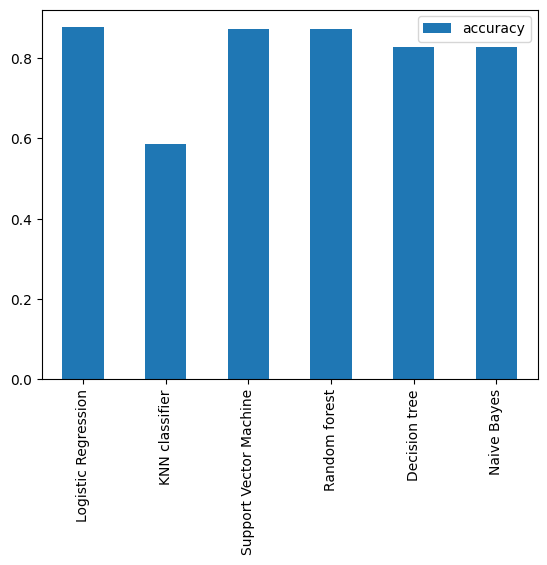

In [67]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

<Axes: >

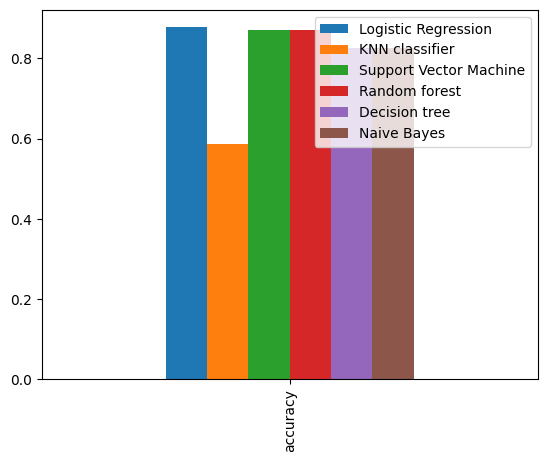

In [68]:
model_compare.plot(kind='bar') # (Not transposing the legends and y axis)
# Yes, we can see that Random Forest has 1% better accuracy than Logisitic regression but Random Forest is a overfitted model hence we will select Logistic regression as our final model

In [69]:
# Feature importance
# These coef's tell how much and in what way did each one of it contribute to predicting the target variable
# Logistic regression

feature_dict=dict(zip(dataset.columns,list(lr.coef_[0])))
feature_dict

#This is a type of Model driven Exploratory data analysis

{'Unnamed: 0': np.float64(0.0003696386263247407),
 'Experience (YY.MM)': np.float64(-0.139768269087735),
 'Age in YY.': np.float64(0.019622030113020394),
 'Stay/Left': np.float64(-0.02462735254828007),
 'New Location': np.float64(-0.09666512117595111),
 'New Promotion': np.float64(-2.753336140227429),
 'New Job Role Match': np.float64(0.3131234848911688),
 'Agency': np.float64(0.020270885400191594),
 'Direct': np.float64(-0.2047872084189279),
 'Employee Referral': np.float64(-0.38796318781395894),
 'Marr.': np.float64(0.5042922677935125),
 'Single': np.float64(0.012278081892872189),
 'other status': np.float64(0.22031197143819936),
 'B1': np.float64(-0.17649315174509814),
 'B2': np.float64(0.09367965846372645),
 'B3': np.float64(-0.008891316284399754),
 'other group': np.float64(0.12993373214172077),
 '< =1': np.float64(-0.0013265702692962927),
 '> 1 & < =3': np.float64(0.05949484170052019),
 'Operation': np.float64(0.018200464245567725),
 'Sales': np.float64(0.050911855926338984),
 'S

<Axes: title={'center': 'Feature Importance'}>

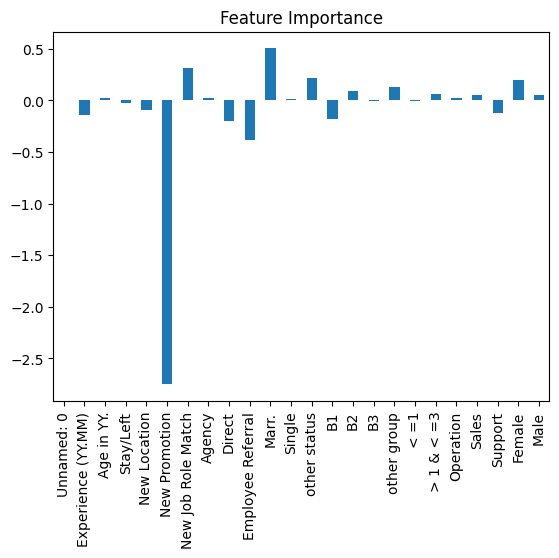

In [70]:
#Visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")
# As we can see that "New promotion" column has the highest feature importance

In [72]:
# Saving model
# Logistic Regression model because it has best accuracy as well it is neither overfitted nor underfitted

model = lr.fit(X_train,y_train)

import pickle
# save the model to disk
filename = 'finalized_model.pickle'
pickle.dump(model, open(filename, 'wb'))